In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
#DATA EXPLORATION & PREPROCESSING
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# Load dataset
data = pd.read_csv("Alphabets_data.csv")
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
data.shape

(20000, 17)

In [5]:
data.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [6]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [7]:
X = data.drop("letter", axis=1)
y = data["letter"]

In [8]:
# Encode labels if categorical
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
#Training samples:
X_train.shape[0]

16000

In [12]:
#Testing samples:
X_test.shape[0]

4000

In [13]:
#Number of classes:
len(np.unique(y))

26

In [14]:
#BASIC ANN MODEL IMPLEMENTATION
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, verbose=1)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6269 - loss: 1.4103 - val_accuracy: 0.7845 - val_loss: 0.7656
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8149 - loss: 0.6438 - val_accuracy: 0.8322 - val_loss: 0.5554
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8606 - loss: 0.4856 - val_accuracy: 0.8675 - val_loss: 0.4439
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8846 - loss: 0.3917 - val_accuracy: 0.8920 - val_loss: 0.3738
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9021 - loss: 0.3299 - val_accuracy: 0.9030 - val_loss: 0.3317
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9151 - loss: 0.2843 - val_accuracy: 0.9118 - val_loss: 0.2931
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9278 - loss: 0.2466 - val_accuracy: 0.9197 - val_loss: 0.2608
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9337 - loss: 0.2231 - val_accuracy: 0.

In [17]:
#HYPERPARAMETER TUNING
from sklearn.model_selection import ParameterGrid
# Define hyperparameter grid
param_grid = {
    "hidden_layers": [[128,64], [256,128,64], [128,128]],
    "activation": ["relu", "tanh"],
    "learning_rate": [0.01, 0.001],
    "batch_size": [32, 64]
}

In [18]:
param_grid 

{'hidden_layers': [[128, 64], [256, 128, 64], [128, 128]],
 'activation': ['relu', 'tanh'],
 'learning_rate': [0.01, 0.001],
 'batch_size': [32, 64]}

In [19]:
best_model = None
best_score = 0
results = []

In [20]:
for params in ParameterGrid(param_grid):
    # Build model dynamically
    model = Sequential()
    model.add(Dense(params["hidden_layers"][0], activation=params["activation"], input_shape=(X_train.shape[1],)))
    for units in params["hidden_layers"][1:]:
        model.add(Dense(units, activation=params["activation"]))
    model.add(Dense(len(np.unique(y)), activation='softmax'))
    # Compile with custom learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=params["learning_rate"])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Train briefly
    model.fit(X_train, y_train, epochs=10, batch_size=params["batch_size"], verbose=0)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    results.append((params, acc))
    if acc > best_score:
        best_score = acc
        best_model = model
        best_params = params

In [21]:
#EVALUATION
# Predictions
y_pred = np.argmax(best_model.predict(X_test), axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step


In [22]:
#Classification Report:
print(classification_report(y_test, y_pred, target_names=le.classes_))
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           A       0.96      0.98      0.97       158
           B       0.88      0.89      0.89       153
           C       0.95      0.96      0.95       147
           D       0.97      0.94      0.96       161
           E       0.95      0.93      0.94       154
           F       0.97      0.90      0.93       155
           G       0.89      0.98      0.93       155
           H       0.97      0.84      0.90       147
           I       0.98      0.91      0.95       151
           J       0.94      0.96      0.95       149
           K       0.94      0.93      0.94       148
           L       0.97      0.97      0.97       152
           M       1.00      0.95      0.97       158
           N       0.95      0.92      0.93       157
           O       0.96      0.93      0.94       150
           P       0.96      0.98      0.97       161
           Q       0.96      1.00      0.98       157
           R       0.82    

In [23]:
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9497
Precision: 0.9512
Recall: 0.9497
F1 Score: 0.9498


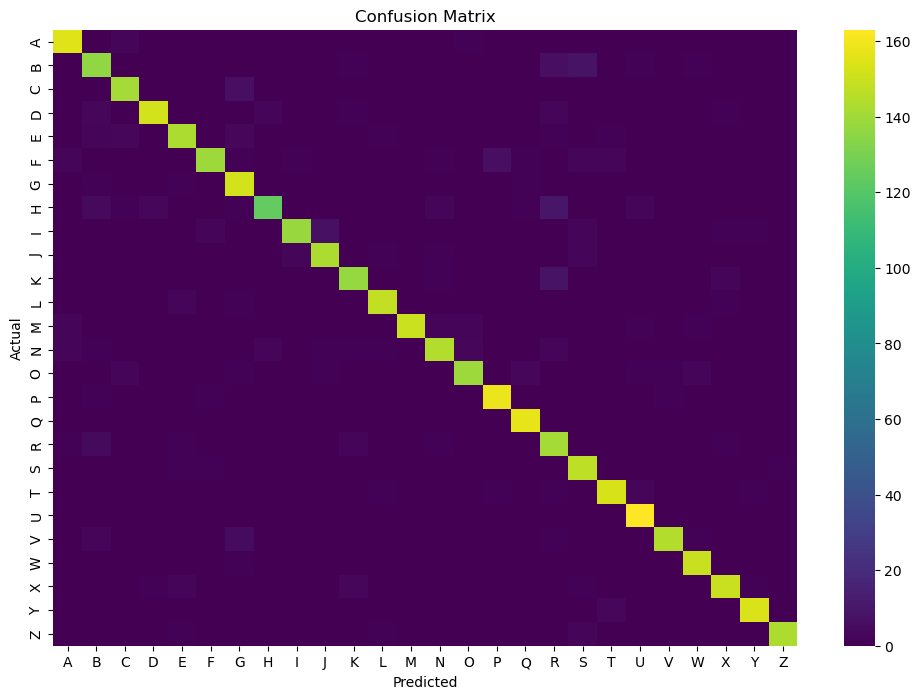

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="viridis", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

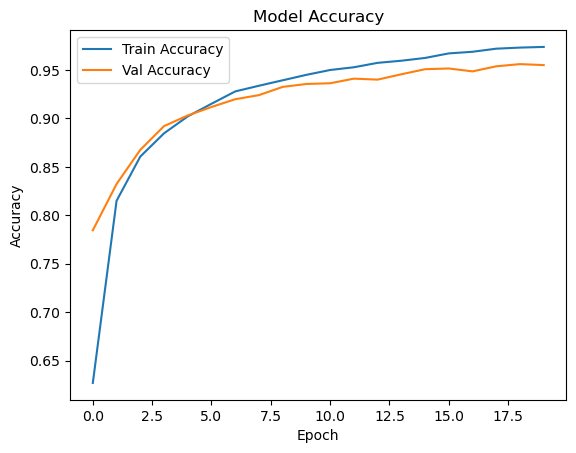

In [25]:
# Plot Training vs Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

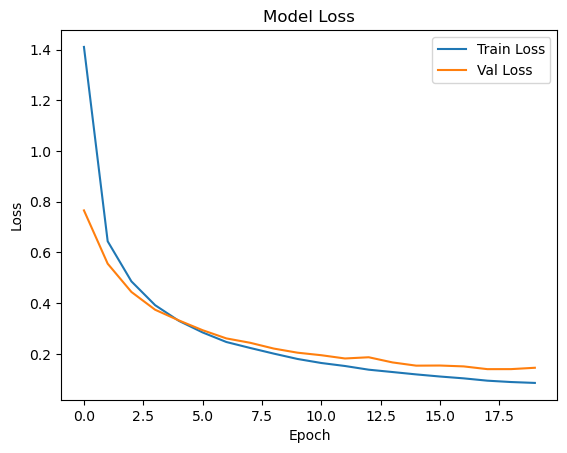

In [26]:
# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [27]:
#Conclusion 
#The ANN model on the Alphabets_data.csv dataset showed that hyperparameter tuning significantly 
#improves accuracy and reliability compared to the baseline model. 
#This assignment highlighted the importance of preprocessing, model design,and optimization in achieving effective alphabet classification.